In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
exponents = np.linspace(2, 4, num=2*10 + 1)
values = [int(10 ** x) for x in exponents][:-5]

In [3]:
with open("../sauron_results_3/projection_accuracy/ts.pkl", "rb") as f:
    accuracy_measurements = pickle.load(f)

In [4]:
rmse_results = []
mape_results = []
for f in values:
    rmse_row = []
    mape_row = []
    for n in values:
        accuracy = accuracy_measurements[(f, n)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = float(accuracy[0])
            # used_bytes
            mape_output = float(accuracy[1])
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)

In [5]:
ts_rmse_df = pd.DataFrame(rmse_results, index =values, columns=values).round(3)

In [6]:
ts_mape_df = pd.DataFrame(mape_results, index =values, columns=values).round(3)

In [7]:
with open("../sauron_results_3/projection_accuracy/trp.pkl", "rb") as f:
    accuracy_measurements = pickle.load(f)

In [8]:
rmse_results = []
mape_results = []
for f in values:
    rmse_row = []
    mape_row = []
    for n in values:
        accuracy = accuracy_measurements[(f, n)]
        if accuracy == None:
            rmse_output = np.nan
            mape_output = np.nan
        else:
            # cpu_peak
            rmse_output = float(accuracy[0])
            # used_bytes
            mape_output = float(accuracy[1])
        rmse_row.append(rmse_output)
        mape_row.append(mape_output)
    rmse_results.append(rmse_row)
    mape_results.append(mape_row)

In [9]:
trp_rmse_df = pd.DataFrame(rmse_results, index =values, columns=values).round(3)

In [10]:
trp_mape_df = pd.DataFrame(mape_results, index =values, columns=values).round(3)

## Figure 4

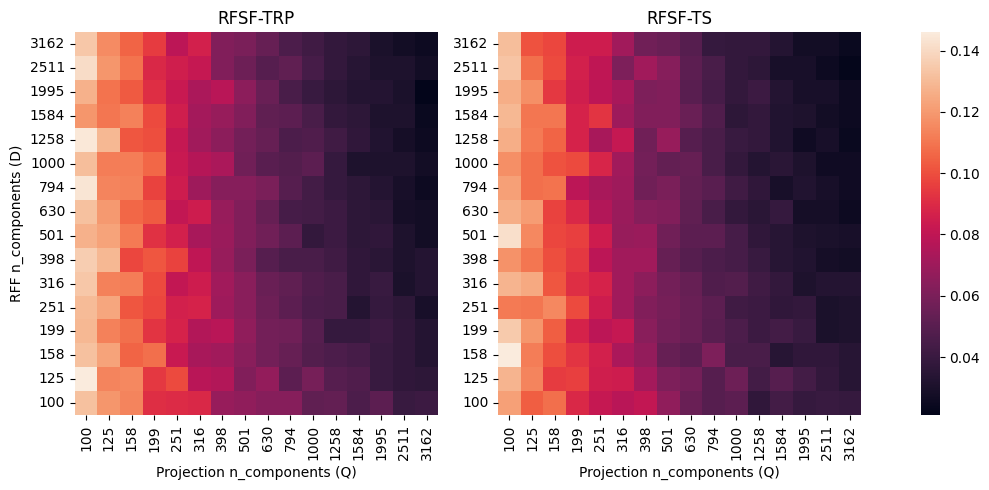

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5), sharey=False, gridspec_kw=dict(width_ratios=[1,1,0.05]))

vmin = min(trp_mape_df.values.min(), ts_mape_df.values.min())
vmax = min(trp_mape_df.values.max(), ts_mape_df.values.max())

ax_ = ax[0]
sns.heatmap(trp_mape_df, ax=ax_, vmin=vmin, vmax=vmax, cbar=False)
ax_.set_title("RFSF-TRP")
ax_.set_ylabel("RFF n_components (D)")
ax_.set_xlabel("Projection n_components (Q)")
ax_.set_ylim(ax_.get_ylim()[::-1])

ax_ = ax[1]
sns.heatmap(ts_mape_df, ax=ax_, vmin=vmin, vmax=vmax, cbar=False)
ax_.set_title("RFSF-TS")
# ax_.set_ylabel("RFF n_components (D)")
ax_.set_xlabel("Projection n_components (Q)")
ax_.set_ylim(ax_.get_ylim()[::-1])

# Add the colorbar to the separate axis
cbar = fig.colorbar(ax[1].collections[0], cax=ax[2])
cbar.outline.set_visible(False)

plt.tight_layout()
plt.savefig("projection_rff_mape.pdf")